In [1]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461 (from 1)
Receiving objects: 100% (17469/17469), 7.36 MiB | 7.81 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (18304/18304), done.


In [2]:
!ls AESLC/enron_subject_line

dev  test  train


In [3]:
train_path = './AESLC/enron_subject_line/train'
val_path = './AESLC/enron_subject_line/dev'
test_path = './AESLC/enron_subject_line/test'

In [4]:
import pandas as pd
import os

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
train_df = pd.DataFrame(columns=["Email", "Subject"])

for filename in os.listdir(train_path):
    with open(os.path.join(train_path,filename)) as f:
        content = f.read().split('@subject\n')
        train_df = pd.concat([train_df, pd.DataFrame.from_records([{"Email": content[0], "Subject": content[1]}])], ignore_index = True)

In [8]:
train_df.head()

,Email,Subject
0,"Joe, thanks for the assistance.\nWe have a few...",Weekend Activity
1,Can you add the referenced counterparty to the...,"HS Resources, Inc."
2,This morning it was discovered that a portion ...,John Arnold Gas Daily Position
3,"As a reminder, the state of Texas requires rel...",Natrual Gas Release Reporting Requirements for...
4,Have you had a chance to review the draft of t...,Enron LNG Atlantic Holdings Ltd.


In [10]:
train_df.shape

(14436, 2)

In [12]:
import re

In [13]:
df_val = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
delimiters = r'@subject\n|\n\n@ann0\n|\n\n@ann1\n|\n\n@ann2\n'
for filename in os.listdir(val_path):
    with open(os.path.join(val_path,filename)) as f:
        content_val = f.read()
        split_string = re.split(delimiters,content_val)
        df_val = pd.concat([df_val,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

In [14]:
df_val.head()

,Email,Subject,Ann0,Ann1,Ann2
0,"As the November elections approach, I encourag...",Voter Registration Reminder,remember to register before november,be sure to vote,valid voter registration
1,"As of start of business, Wednesday, February 6...",Quick Tips for the UBSWE migration,ubsw energy environment,ubsw energy migration tips,reminders about wednesday's migration to ubsw ...
2,"In reviewing the contracts, so far I have the ...",LNG Contract Questions,questions about contracts,questions after reviewing the contracts,questions so far regarding contracts
3,A few news flashes re: limitations on products...,Online Product News,reminder: limitations on products in argentina,news flashes,limitations on products- argentina physical gas
4,"As of start of business, Wednesday, February 6...",Quick Tips for the UBSWE migration,tips for migration to ubsw energy,migration to ubsw energy environment,reminder: transition to ubsw energy environmen...


In [15]:
df_val.shape

(1960, 5)

In [16]:
df_test = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
for filename in os.listdir(test_path):
    with open(os.path.join(test_path,filename)) as f:
        content_test = f.read()
        split_string = re.split(delimiters,content_test)
        df_test = pd.concat([df_test,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

In [17]:
df_test.head()

,Email,Subject,Ann0,Ann1,Ann2
0,"Order # 013307830292 Dear Jeffrey Dasovich,...",Williams-Sonoma Order Shipping Confirmation,order #013307830292,william-sonoma order shipping info,order shipped
1,"Gentlemen, I have made changes to the consoli...",Consolidation Agreement,suggestions for the termination agreement,consolidation draft for review/questions regar...,consolidation agreement revisions
2,A mandatory meeting requested by Ray Bowen has...,Cash Forecasting,***important*** mandatory meeting today at 2:0...,mandatory meeting 2:00pm in eb2021,mandatory meeting today at 2:00 pm
3,Dear HBS Alumni: b3686a1.jpg Spend an evening ...,HBS Club Dinner Boat Cruise October 6,hbs club invites you on an evening cruise!,alumni first social event of the year,hbs alumni cruise on the galveston bay: 10/6
4,"Dear Futures Trader, What follows is the firs...","FutureSource's new ""FAST BREAK""",futuresource's newest service traders,first issue of fast break market updates,fast break!


In [18]:
df_test.shape

(1906, 5)

In [19]:
train_df.to_csv(r'train.csv')
df_val.to_csv(r'val.csv')
df_test.to_csv(r'test.csv')

In [20]:
!ls

AESLC  sample_data  test.csv  train.csv  val.csv


In [21]:
import numpy as np

In [25]:
narray = train_df.to_numpy()
length_checker = np.vectorize(len)

arr_len = length_checker(narray)

arr_len

array([[256,  16],
       [164,  18],
       [375,  30],
       ...,
       [639,  25],
       [393,  55],
       [189,  32]])

In [26]:
narray_val = df_val.to_numpy()
arr_len_val = length_checker(narray_val)

arr_len_val

array([[ 335,   27,   36,   15,   24],
       [ 783,   34,   23,   26,   64],
       [1352,   22,   25,   39,   36],
       ...,
       [ 450,   26,   18,   23,   22],
       [ 693,   14,   28,   51,   32],
       [ 581,   35,   31,   35,    4]])

In [27]:
narray_test = df_test.to_numpy()
arr_len_test = length_checker(narray_test)

arr_len_test

array([[540,  43,  19,  34,  13],
       [837,  23,  41,  72,  33],
       [183,  16,  82,  34,  34],
       ...,
       [244,  23,  18,  49,  17],
       [212,   9,  10,  31,  10],
       [839,  17,  33,  55,  30]])

In [28]:
print(np.mean(arr_len, axis = 0))
print(np.mean(arr_len_val, axis = 0))
print(np.mean(arr_len_test, axis = 0))

[790.94444444  26.19278193]
[811.65306122  27.27908163  30.85153061  32.89234694  31.94540816]
[690.8683106   26.97219307  32.62329486  33.64742917  33.27701994]


In [29]:
print(np.median(arr_len, axis = 0))
print(np.median(arr_len_val, axis = 0))
print(np.median(arr_len_test, axis = 0))

[425.  23.]
[443.  23.  28.  30.  29.]
[451.  24.  30.  32.  31.]


In [31]:
df_length = pd.DataFrame(arr_len, columns = ["Email Length", "Subject Length"])
df_length.head()

,Email Length,Subject Length
0,256,16
1,164,18
2,375,30
3,1342,52
4,179,32


In [33]:
df_length.shape

(14436, 2)

In [34]:
df_val_length = pd.DataFrame(arr_len_val, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_val_length.head()

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,335,27,36,15,24
1,783,34,23,26,64
2,1352,22,25,39,36
3,432,19,46,12,47
4,783,34,33,36,56


In [35]:
df_val_length.shape

(1960, 5)

In [36]:
df_test_length = pd.DataFrame(arr_len_test, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_test_length.head()

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,540,43,19,34,13
1,837,23,41,72,33
2,183,16,82,34,34
3,1637,37,42,37,44
4,831,31,37,40,11


In [37]:
df_test_length.shape

(1906, 5)

In [38]:
df_length.max(axis=0)

,0
Email Length,39003
Subject Length,117


In [39]:
df_length.min(axis=0)

,0
Email Length,94
Subject Length,1


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

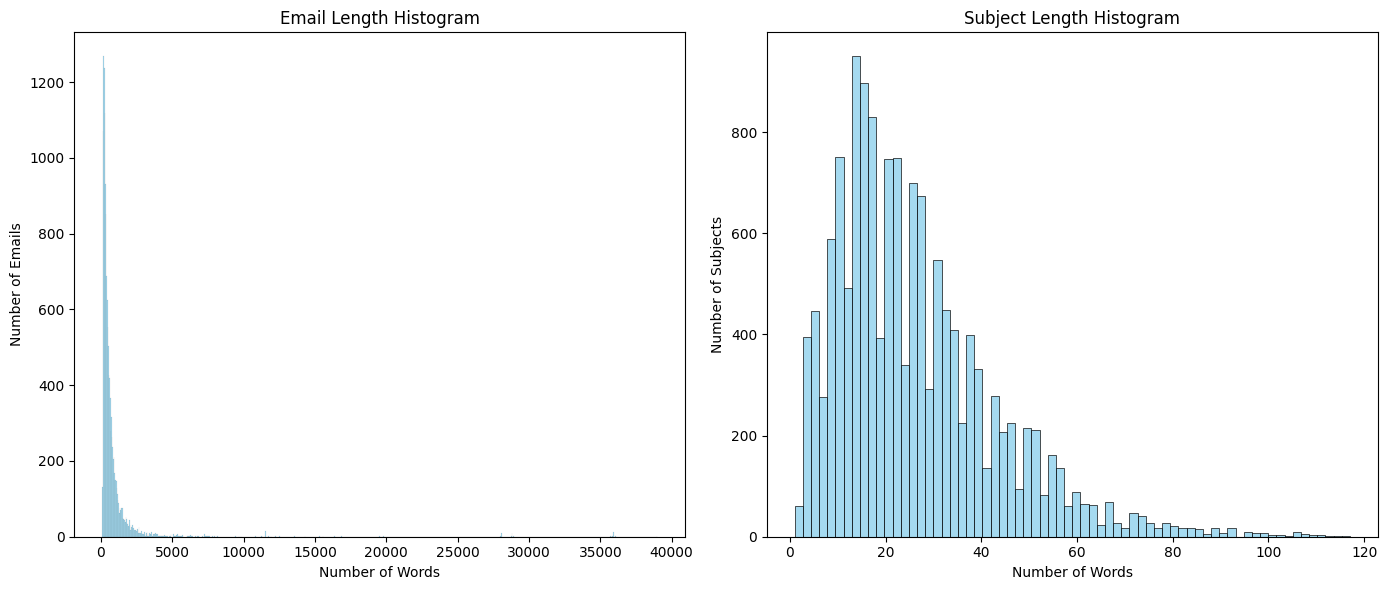

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_length['Email Length'], color="skyblue", ax=axes[0])
axes[0].set(xlabel="Number of Words", ylabel="Number of Emails", title="Email Length Histogram")

sns.histplot(df_length['Subject Length'], color="skyblue", ax=axes[1])
axes[1].set(xlabel="Number of Words", ylabel="Number of Subjects", title="Subject Length Histogram")

plt.tight_layout()

plt.show()

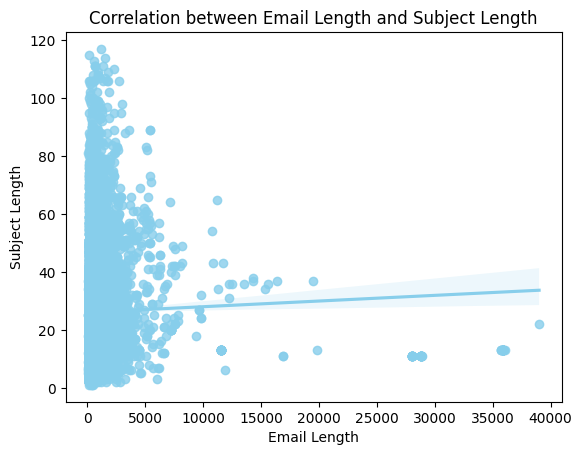

In [52]:
ax = sns.regplot(data=df_length, x="Email Length", y="Subject Length", scatter_kws={"color": "skyblue"}, line_kws={"color": "skyblue"})
ax.set(title="Correlation between Email Length and Subject Length")
plt.show()

[Text(0.5, 1.0, 'Correlation between Email Length and Subject Length')]

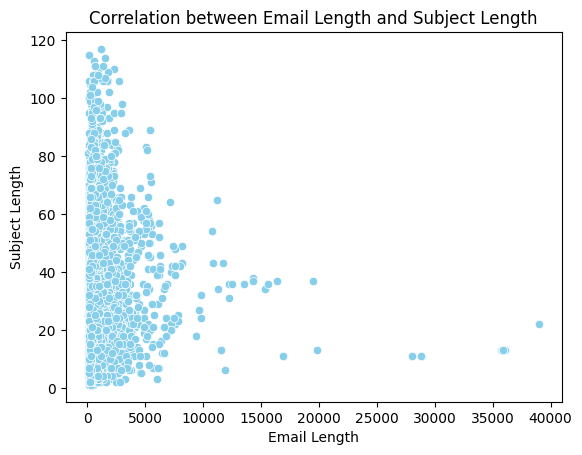

In [53]:
ax = sns.scatterplot(data=df_length, x="Email Length", y="Subject Length" , color="skyblue")
ax.set(title = "Correlation between Email Length and Subject Length")

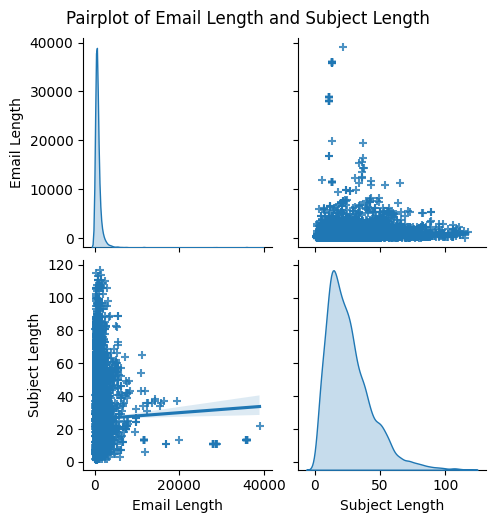

In [58]:
sns.pairplot(df_length, vars=["Email Length", "Subject Length"], kind="reg", diag_kind="kde", markers="+")
plt.suptitle("Pairplot of Email Length and Subject Length", y=1.03)
plt.show()


In [73]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import pi

# # Data for the radar chart
# categories = ['Writing', 'Roleplay', 'Reasoning', 'Math', 'Coding', 'Education', 'STEM', 'Humanities']
# values = [8, 7, 6, 7, 8, 7, 9, 8]  # Example values for one model
# values += values[:1]  # Repeat the first value to close the circle

# # Number of variables we're plotting
# num_vars = len(categories)

# # Compute angle for each category
# angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
# angles += angles[:1]

# # Initialize the radar chart
# fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# # Draw the outline of the chart
# ax.plot(angles, values, linewidth=2, linestyle='solid', label='Model 1')
# ax.fill(angles, values, 'skyblue', alpha=0.4)

# # Add labels
# plt.xticks(angles[:-1], categories)

# # Add a title and legend
# plt.title('Performance Comparison')
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# plt.show()


In [68]:
train_df_length = len(train_df)

In [69]:
train_df_length

14436

In [70]:
test_df_length = len(df_test)
test_df_length

1906

In [71]:
val_df_length = len(df_val)
val_df_length

1960

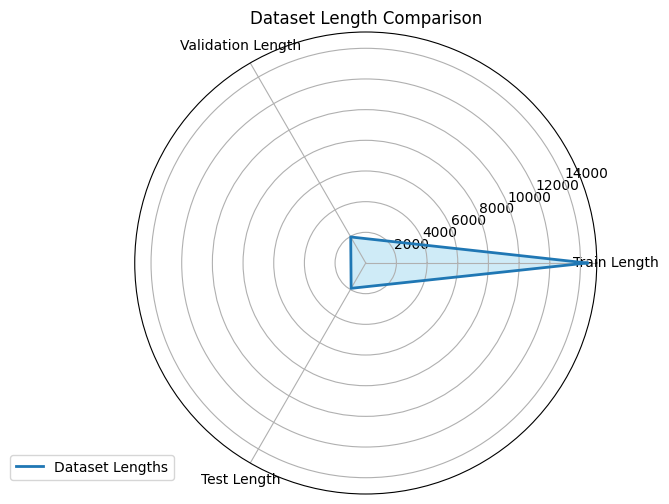

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming you have defined these variables
train_df_length = len(train_df)
val_df_length = len(df_val)
test_df_length = len(df_test)

# Data for the radar chart
categories = ['Train Length', 'Validation Length', 'Test Length']
values = [train_df_length, val_df_length, test_df_length]

# Repeat the first value to close the circle
values += values[:1]

# Number of variables we're plotting
num_vars = len(categories)

# Compute angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of the chart
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Dataset Lengths')
ax.fill(angles, values, 'skyblue', alpha=0.4)

# Add labels
plt.xticks(angles[:-1], categories)

# Add a title and legend
plt.title('Dataset Length Comparison')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


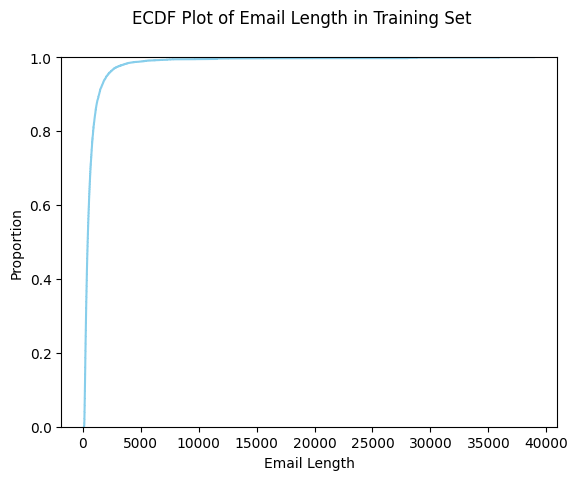

In [54]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Email Length'], color="skyblue")
plt.show()

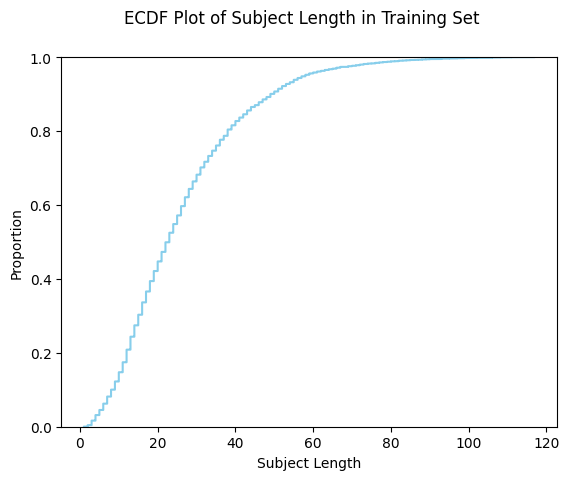

In [55]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Subject Length'], color="skyblue")
plt.show()

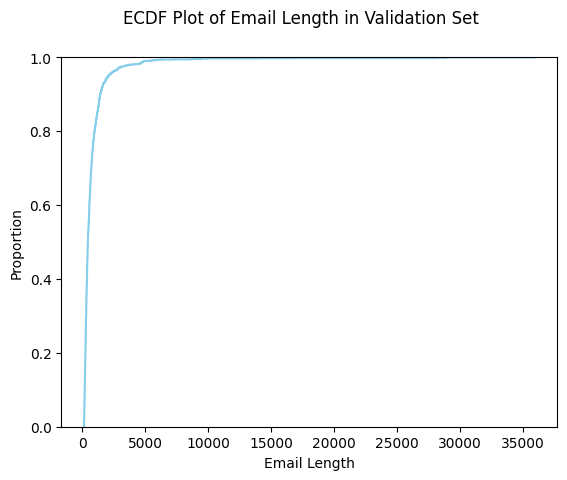

In [74]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Email Length'], color="skyblue")
plt.show()

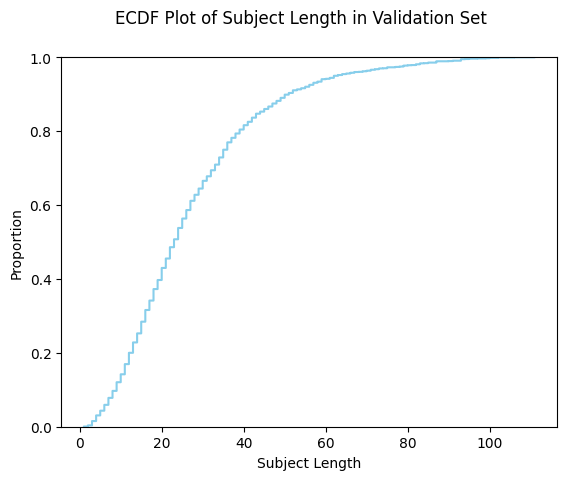

In [75]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Subject Length'], color="skyblue")
plt.show()

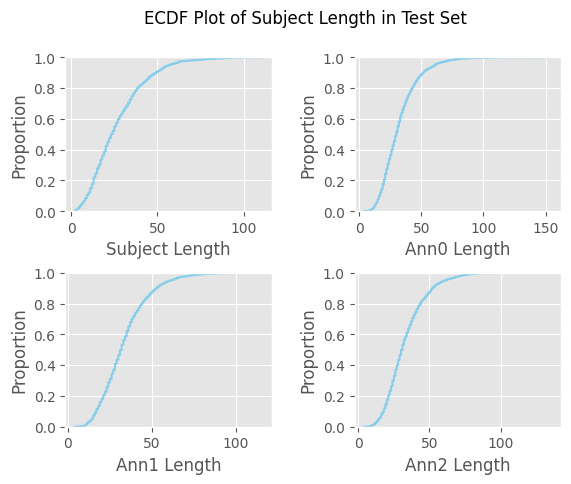

In [81]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Test Set")
plt.style.use('ggplot')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.ecdfplot(data=df_test_length, x=df_test_length['Subject Length'], color="skyblue")
ax.set(xlabel='Subject Length')
ax = fig.add_subplot(2, 2, 2)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann0'],ax=ax, color="skyblue")
ax.set(xlabel='Ann0 Length')
ax = fig.add_subplot(2, 2, 3)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann1'],ax=ax, color="skyblue")
ax.set(xlabel='Ann1 Length')
ax = fig.add_subplot(2, 2, 4)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann2'],ax=ax, color="skyblue")
ax.set(xlabel='Ann2 Length')
plt.show()

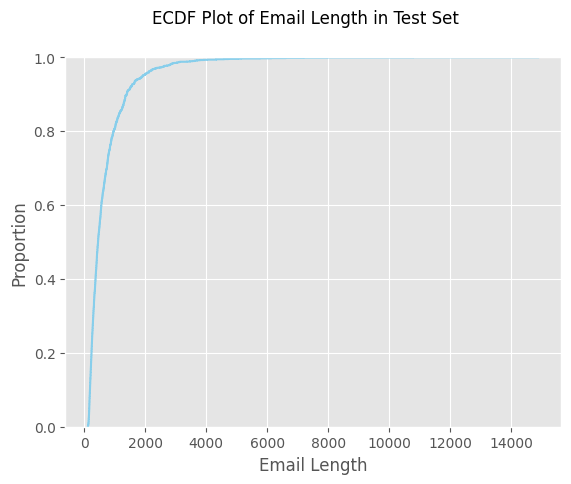

In [82]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Test Set")
sns.ecdfplot(data=df_test_length, x=df_test_length['Email Length'], color="skyblue")
plt.show()

In [83]:
!ls

AESLC  sample_data  test.csv  train.csv  val.csv


In [85]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import pi

# # Data for multiple models
# model_data = {
#     'Model 1': [8, 7, 6, 7, 8, 7, 9, 8],
#     'Model 2': [7, 6, 8, 6, 7, 8, 7, 9],
#     'Model 3': [6, 8, 7, 8, 6, 7, 8, 7]
# }

# # Categories and number of variables
# categories = ['Writing', 'Roleplay', 'Reasoning', 'Math', 'Coding', 'Education', 'STEM', 'Humanities']
# num_vars = len(categories)

# # Compute the angle for each category
# angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
# angles += angles[:1]  # Complete the loop

# # Initialize the radar chart
# fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# # Plot each model's data
# for model, values in model_data.items():
#     values += values[:1]  # Complete the loop for the model
#     ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
#     ax.fill(angles, values, alpha=0.25)

# # Add labels and title
# plt.xticks(angles[:-1], categories)
# plt.title('Performance Comparison')

# # Show the legend
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Show the plot
# plt.show()


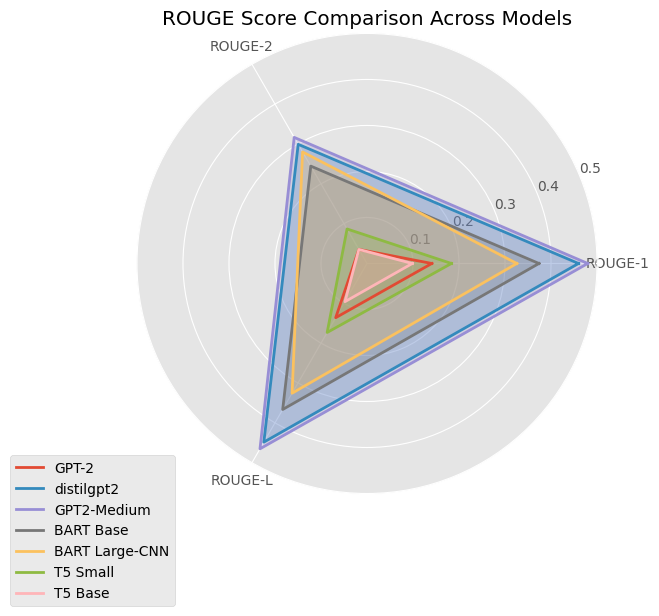

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model's data
for model, values in model_data.items():
    values += values[:1]  # Complete the loop for the model
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
plt.xticks(angles[:-1], categories)
plt.title('ROUGE Score Comparison Across Models')

# Show the legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


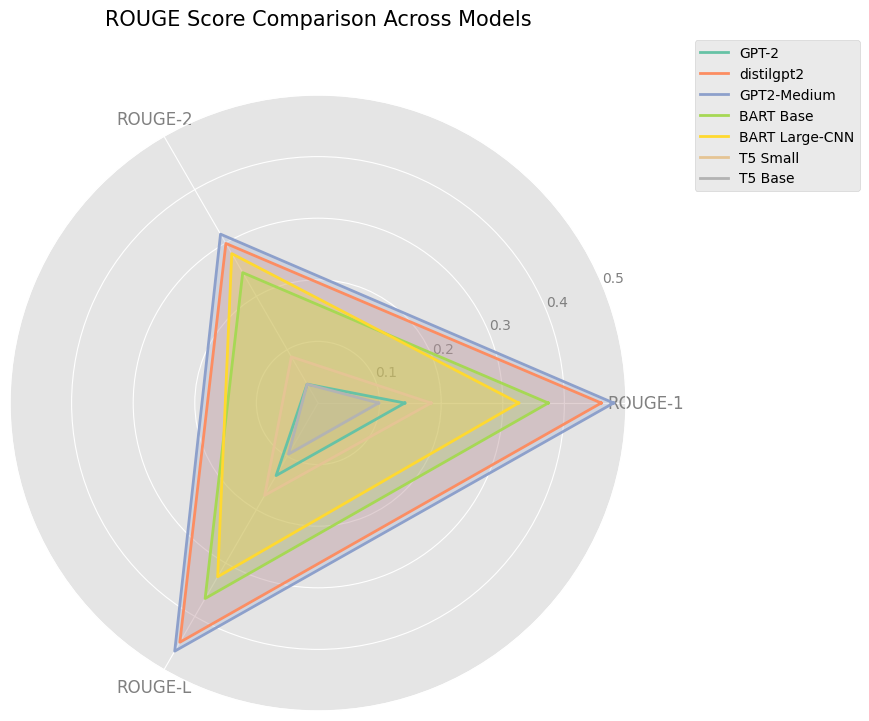

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Color palette
colors = plt.cm.get_cmap('Set2', len(model_data))

# Plot each model's data with different colors and styles
for idx, (model, values) in enumerate(model_data.items()):
    values += values[:1]  # Complete the loop for the model
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors(idx))
    ax.fill(angles, values, alpha=0.25, color=colors(idx))

# Add labels and title
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color='grey', size=10)
plt.ylim(0, 0.5)
plt.title('ROUGE Score Comparison Across Models', size=15, color='black', y=1.1)

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Show the plot
plt.show()


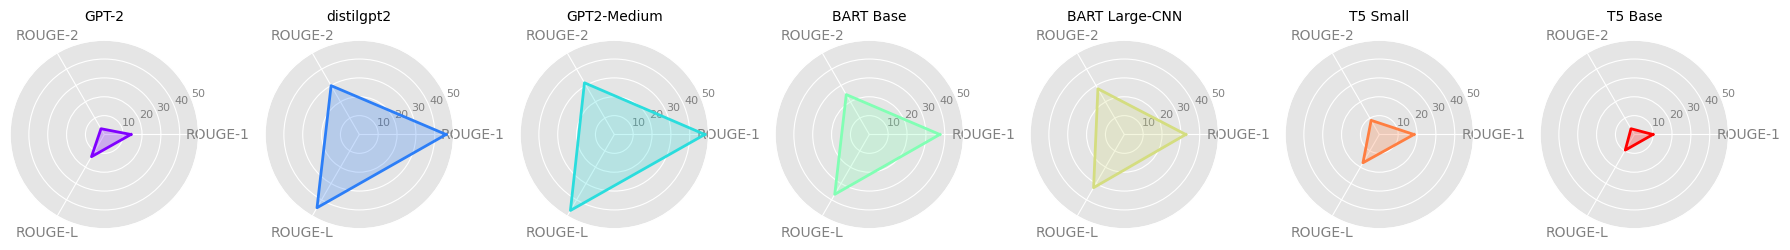

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model, converted to percentages
model_data = {
    'GPT-2': [14.09, 3.53, 13.61],
    'distilgpt2': [45.98, 29.91, 44.85],
    'GPT2-Medium': [47.99, 31.65, 46.52],
    'BART Base': [37.38, 24.44, 36.65],
    'BART Large-CNN': [32.57, 28.00, 32.57],
    'T5 Small': [18.35, 8.66, 17.32],
    'T5 Base': [9.85, 3.53, 9.59]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a figure with subplots
num_models = len(model_data)
fig, axs = plt.subplots(1, num_models, figsize=(18, 6), subplot_kw=dict(polar=True))

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, num_models))

# Plot radar charts
for i, (model, values) in enumerate(model_data.items()):
    values += values[:1]  # Complete the loop for the model
    axs[i].plot(angles, values, linewidth=2, linestyle='solid', color=colors[i])
    axs[i].fill(angles, values, alpha=0.25, color=colors[i])
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(categories, color='grey', size=10)
    axs[i].set_yticks([10, 20, 30, 40, 50])
    axs[i].set_yticklabels([10, 20, 30, 40, 50], color='grey', size=8)
    axs[i].set_ylim(0, 50)
    axs[i].set_title(f'{model}', size=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


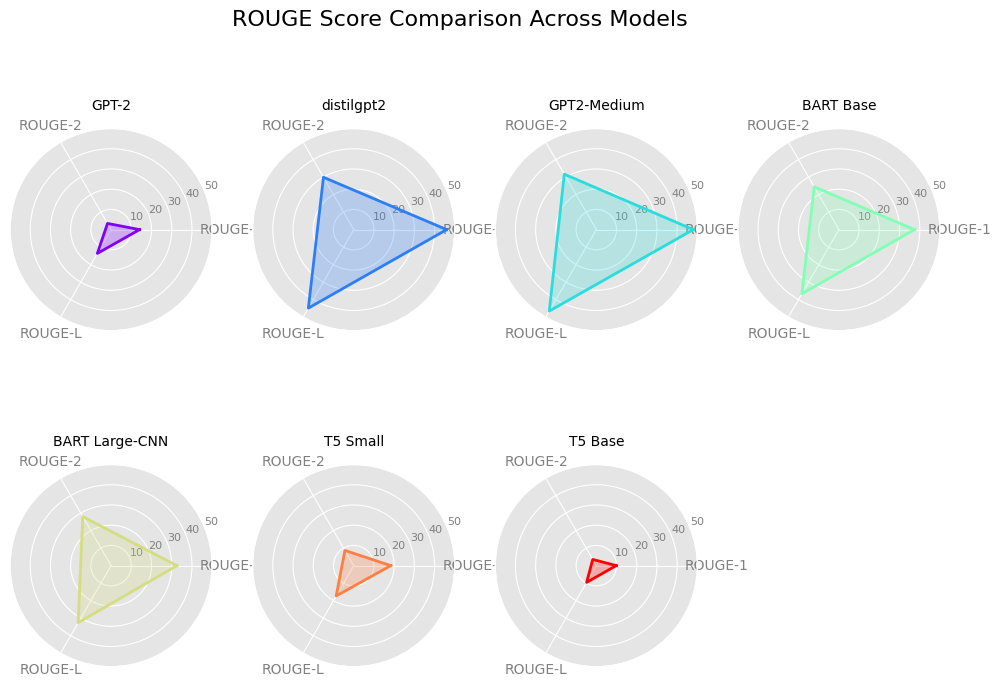

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model, converted to percentages
model_data = {
    'GPT-2': [14.09, 3.53, 13.61],
    'distilgpt2': [45.98, 29.91, 44.85],
    'GPT2-Medium': [47.99, 31.65, 46.52],
    'BART Base': [37.38, 24.44, 36.65],
    'BART Large-CNN': [32.57, 28.00, 32.57],
    'T5 Small': [18.35, 8.66, 17.32],
    'T5 Base': [9.85, 3.53, 9.59]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a 2x4 grid of subplots with reduced size and minimal gaps
fig, axs = plt.subplots(2, 4, figsize=(12, 8), subplot_kw=dict(polar=True))

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_data)))

# Plot radar charts
for i, (model, values) in enumerate(model_data.items()):
    row = i // 4  # Determine the row
    col = i % 4   # Determine the column
    values += values[:1]  # Complete the loop for the model
    axs[row, col].plot(angles, values, linewidth=2, linestyle='solid', color=colors[i])
    axs[row, col].fill(angles, values, alpha=0.25, color=colors[i])
    axs[row, col].set_xticks(angles[:-1])
    axs[row, col].set_xticklabels(categories, color='grey', size=10)
    axs[row, col].set_yticks([10, 20, 30, 40, 50])
    axs[row, col].set_yticklabels([10, 20, 30, 40, 50], color='grey', size=8)
    axs[row, col].set_ylim(0, 50)
    axs[row, col].set_title(f'{model}', size=10, color='black')

# Hide the last subplot if there are only 7 models
if len(model_data) < 8:
    fig.delaxes(axs[1, 3])

# Reduce the gap between subplots, both row-to-row and column-to-column
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.suptitle('ROUGE Score Comparison Across Models', size=16, color='black')

# Show the plot
plt.show()


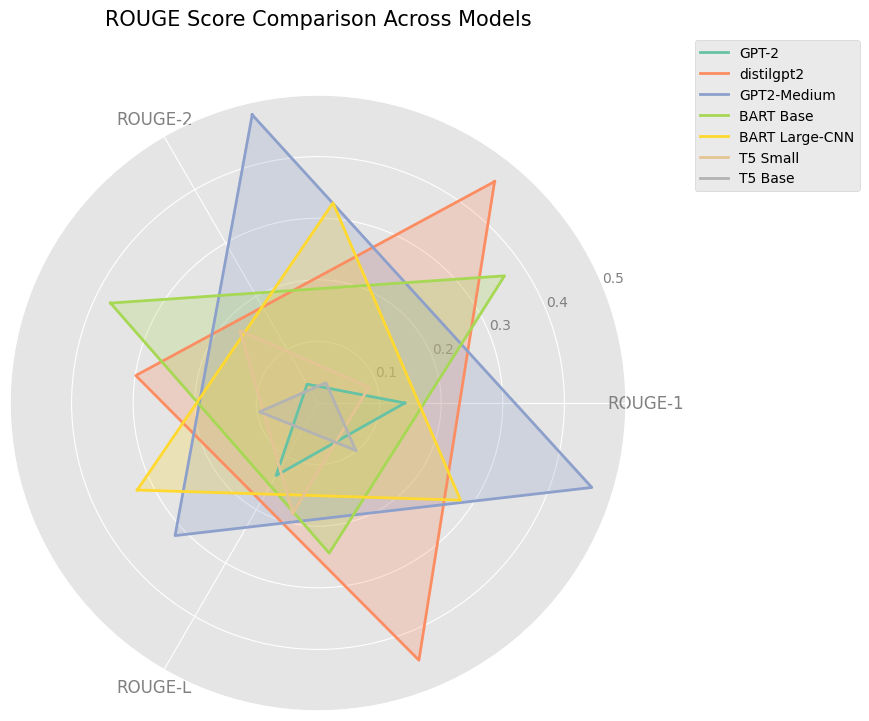

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the base angle for each category
base_angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
base_angles += base_angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Color palette
colors = plt.cm.get_cmap('Set2', len(model_data))

# Define unique angle shifts for each model
angle_shifts = np.linspace(0, 2 * pi, len(model_data), endpoint=False)

# Plot each model's data with different angle shifts
for idx, (model, values) in enumerate(model_data.items()):
    shifted_angles = [(angle + angle_shifts[idx]) % (2 * pi) for angle in base_angles]
    values += values[:1]  # Complete the loop for the model
    ax.plot(shifted_angles, values, linewidth=2, linestyle='solid', label=model, color=colors(idx))
    ax.fill(shifted_angles, values, alpha=0.25, color=colors(idx))

# Add labels and title
plt.xticks(base_angles[:-1], categories, color='grey', size=12)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color='grey', size=10)
plt.ylim(0, 0.5)
plt.title('ROUGE Score Comparison Across Models', size=15, color='black', y=1.1)

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Show the plot
plt.show()


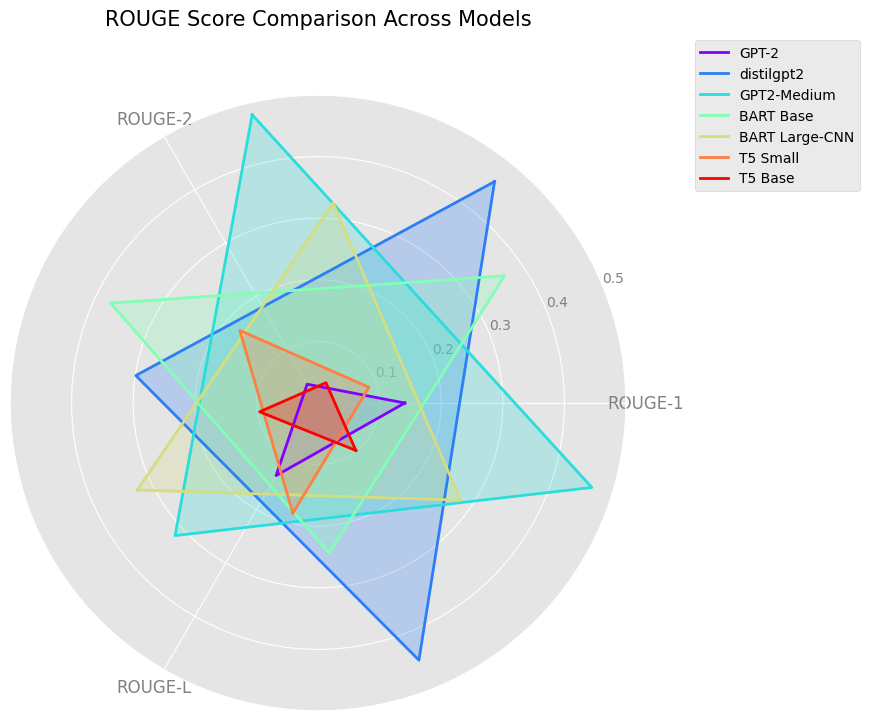

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the base angle for each category
base_angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
base_angles += base_angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_data)))

# Define unique angle shifts for each model
angle_shifts = np.linspace(0, 2 * pi, len(model_data), endpoint=False)

# Plot each model's data with different angle shifts
for idx, (model, values) in enumerate(model_data.items()):
    shifted_angles = [(angle + angle_shifts[idx]) % (2 * pi) for angle in base_angles]
    values += values[:1]  # Complete the loop for the model
    ax.plot(shifted_angles, values, linewidth=2, linestyle='solid', label=model, color=colors[idx])
    ax.fill(shifted_angles, values, alpha=0.25, color=colors[idx])

# Add labels and title
plt.xticks(base_angles[:-1], categories, color='grey', size=12)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color='grey', size=10)
plt.ylim(0, 0.5)
plt.title('ROUGE Score Comparison Across Models', size=15, color='black', y=1.1)

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Show the plot
plt.show()


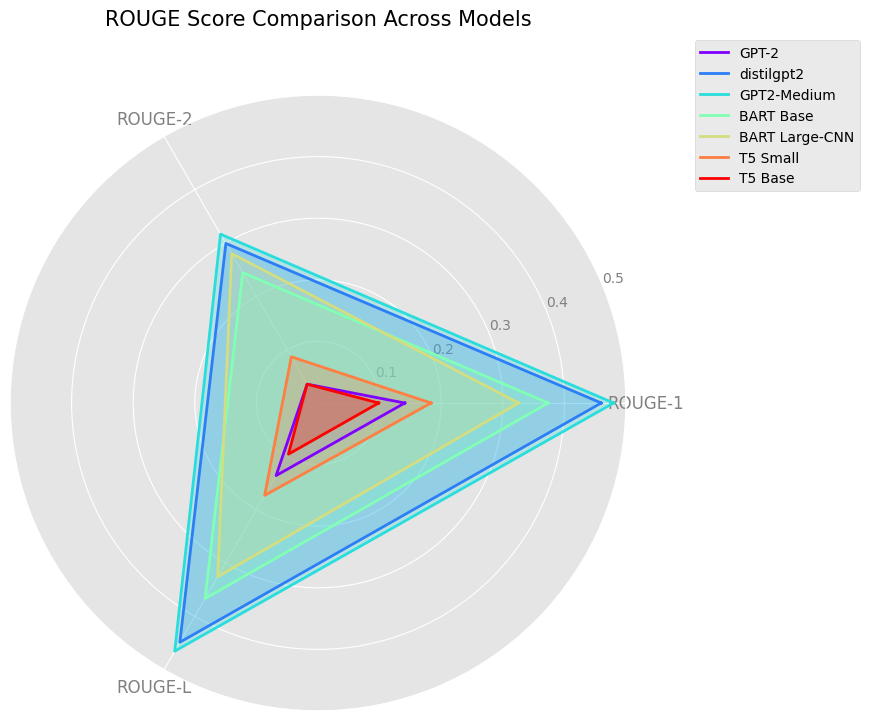

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_data)))

# Plot each model's data with the same angles
for idx, (model, values) in enumerate(model_data.items()):
    values += values[:1]  # Complete the loop for the model
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

# Add labels and title
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color='grey', size=10)
plt.ylim(0, 0.5)
plt.title('ROUGE Score Comparison Across Models', size=15, color='black', y=1.1)

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Show the plot
plt.show()


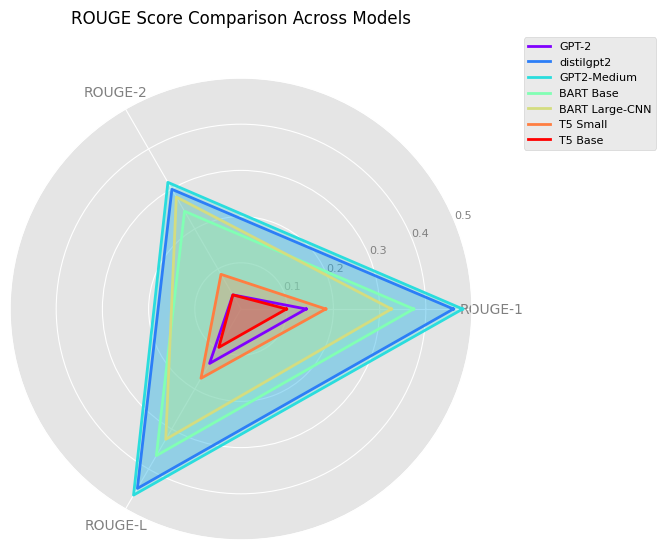

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(polar=True))  # Reduced size

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_data)))

# Plot each model's data with the same angles
for idx, (model, values) in enumerate(model_data.items()):
    values += values[:1]  # Complete the loop for the model
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

# Add labels and title
plt.xticks(angles[:-1], categories, color='grey', size=10)  # Reduced font size
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color='grey', size=8)  # Reduced font size
plt.ylim(0, 0.5)
plt.title('ROUGE Score Comparison Across Models', size=12, color='black', y=1.1)  # Reduced title size

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=8)  # Reduced font size

# Show the plot
plt.show()


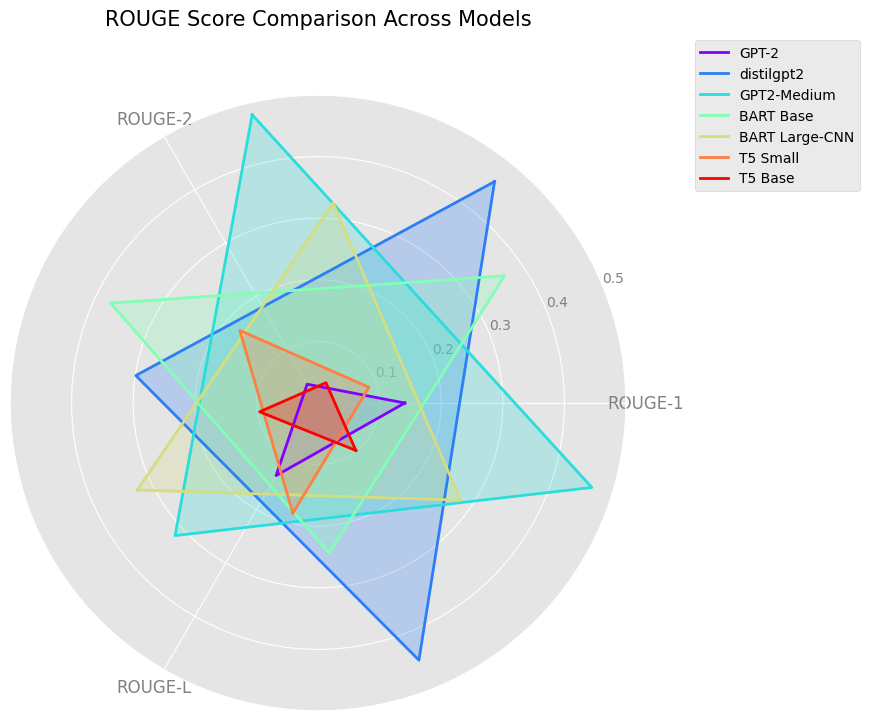

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the base angle for each category
base_angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
base_angles += base_angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_data)))

# Define unique angle shifts for each model
angle_shifts = np.linspace(0, 2 * pi, len(model_data), endpoint=False)

# Plot each model's data with the same angles but different shifts
for idx, (model, values) in enumerate(model_data.items()):
    shifted_angles = [(angle + angle_shifts[idx]) % (2 * pi) for angle in base_angles]
    values += values[:1]  # Complete the loop for the model
    ax.plot(shifted_angles, values, linewidth=2, linestyle='solid', label=model, color=colors[idx])
    ax.fill(shifted_angles, values, alpha=0.25, color=colors[idx])

# Add labels and title
plt.xticks(base_angles[:-1], categories, color='grey', size=12)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], color='grey', size=10)
plt.ylim(0, 0.5)
plt.title('ROUGE Score Comparison Across Models', size=15, color='black', y=1.1)

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Show the plot
plt.show()


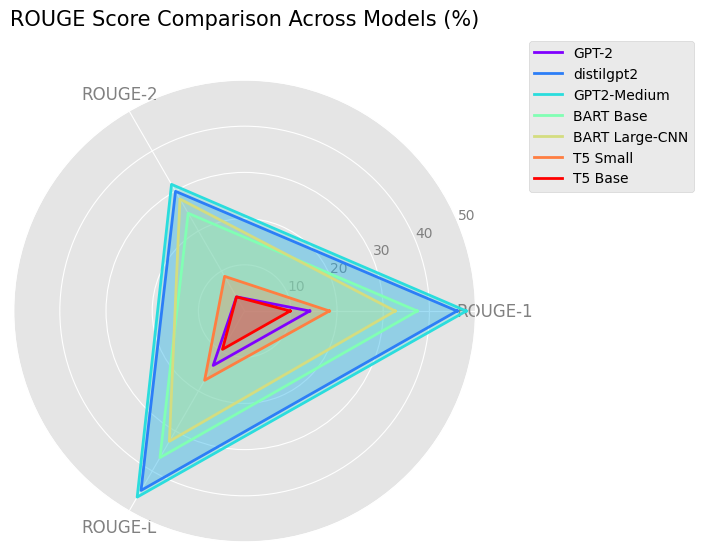

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ROUGE scores for each model (in percentages)
model_data = {
    'GPT-2': [0.1409, 0.0353, 0.1361],
    'distilgpt2': [0.4598, 0.2991, 0.4485],
    'GPT2-Medium': [0.4799, 0.3165, 0.4652],
    'BART Base': [0.3738, 0.2444, 0.3665],
    'BART Large-CNN': [0.3257, 0.2800, 0.3257],
    'T5 Small': [0.1835, 0.0866, 0.1732],
    'T5 Base': [0.0985, 0.0353, 0.0959]
}

# Convert scores to percentages
model_data = {model: [score * 100 for score in scores] for model, scores in model_data.items()}

# Categories and number of variables
categories = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
num_vars = len(categories)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(polar=True))

# Color palette using rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_data)))

# Plot each model's data
for idx, (model, values) in enumerate(model_data.items()):
    values += values[:1]  # Complete the loop for the model
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

# Add labels and title
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks([10, 20, 30, 40, 50], color='grey', size=10)
plt.ylim(0, 50)
plt.title('ROUGE Score Comparison Across Models (%)', size=15, color='black', y=1.1)

# Show the legend with a better location
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Show the plot
plt.show()
